# Southern Water Corporation Pump Function/Failure Analysis

In [2]:
# Import needed libraries w/ basic formatting
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
# Set default size for figures
mpl.rcParams['figure.figsize']=(20,5)

# Descriptive Statistics

In [3]:
# Import Raw data from CSV file
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
#drop Data Source column
dataframe_raw = dataframe_raw.drop(['Data Source'],1)
#change column names
dataframe_raw.columns = ['Date', 'Vol_Flow_1', 'Vol_Flow_2', 'P_Speed (RPM)', 'P_Torque', 'Ambient_Temp', 'HP', 'P_Efficiency', 'P_Failure (1 or 0)']
#set index to 'Date'
dataframe_raw.set_index('Date', inplace=True)
#create headers list
headers = dataframe_raw.columns.tolist()
#print dataframe_raw describe and info
print(dataframe_raw.describe())
print(dataframe_raw.info())

# Import Standard Deviation CSV data
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
# drop Data Source column
dataframe_stdev = dataframe_stdev.drop(['Data Source'],1)
#change column names
dataframe_stdev.columns = ['Date', 'Vol_Flow_1', 'Vol_Flow_2', 'P_Speed (RPM)', 'P_Torque', 'Ambient_Temp', 'HP', 'P_Efficiency', 'P_Failure (1 or 0)']
#set index to 'Date'
dataframe_stdev.set_index('Date', inplace=True)
#create headers list
dataframe_stdev.columns = headers
#print dataframe_stdev describe and info
print(dataframe_stdev.describe())
print(dataframe_stdev.info())

        Vol_Flow_1   Vol_Flow_2  P_Speed (RPM)     P_Torque  Ambient_Temp  \
count  2453.000000  2453.000000    2453.000000  2453.000000   2453.000000   
mean     41.802629    41.796702      90.796576   202.851610     50.226661   
std       3.656576     3.654873      10.217885    22.683977      5.298203   
min       0.000000     0.000000       0.000000     0.000000      0.000000   
25%      41.050000    41.000000      85.000000   191.000000     48.000000   
50%      42.100000    42.140000      91.000000   203.000000     51.000000   
75%      43.140000    43.130000      97.000000   215.000000     53.000000   
max      45.900000    45.840000     124.000000   264.000000     65.000000   

                HP  P_Efficiency  P_Failure (1 or 0)  
count  2453.000000   2453.000000         2453.000000  
mean      3.540897     76.015149            0.021199  
std       0.579055      6.651633            0.144075  
min       0.000000      0.000000            0.000000  
25%       3.220000     74.56000

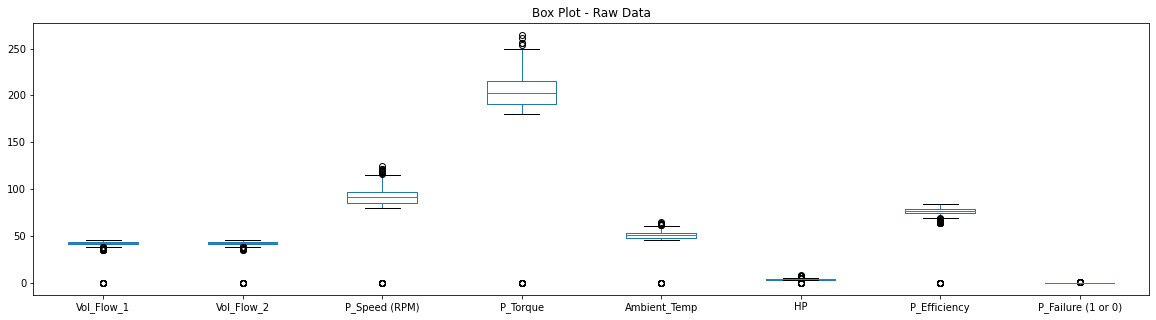

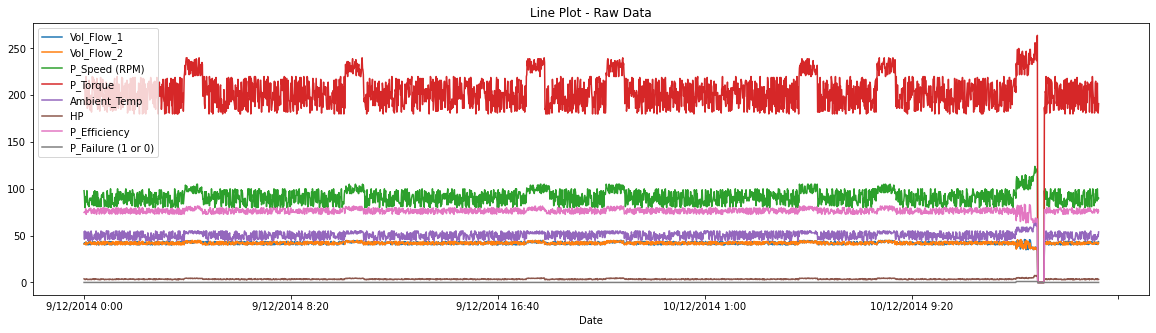

In [4]:
# Plot the raw data to visualize the distribution of each feature in pump operations
dataframe_raw.plot(kind='box', figsize=(20,5), title='Box Plot - Raw Data')

# Plot the raw data to visualize operations by time sequence
dataframe_raw.plot(kind='line', figsize=(20,5), title='Line Plot - Raw Data')
plt.legend(loc='upper left');

(52, 8)
(2401, 8)


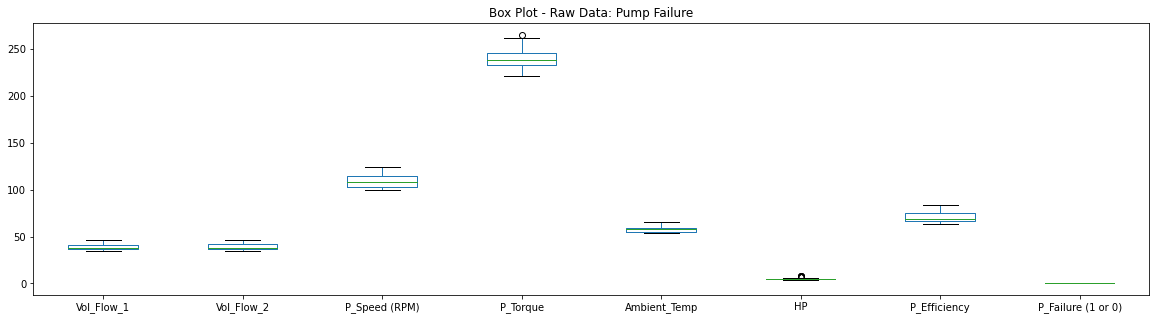

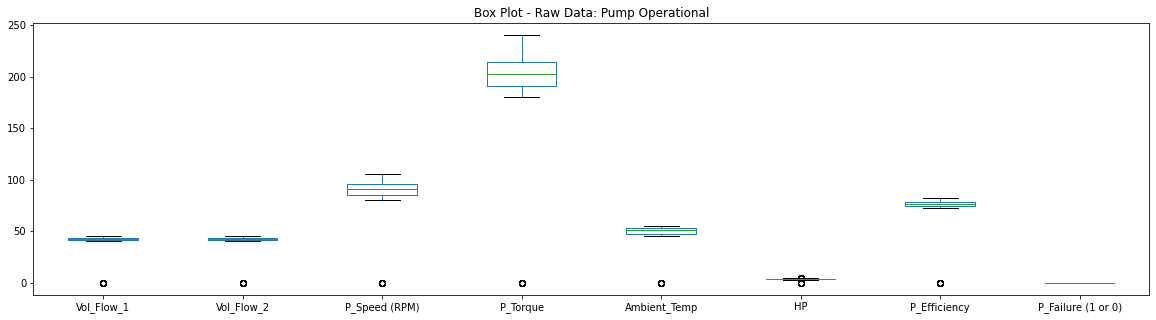

In [5]:
# Define pump failure and look at the dataframe shape
p_fail = dataframe_raw[dataframe_raw['P_Failure (1 or 0)']==1]
print(p_fail.shape)

# Plot the pump failure to visualize the distribution of pump features during pump failure
p_fail.plot(kind='box', figsize=(20,5), title='Box Plot - Raw Data: Pump Failure')

# Define pump operation and look at the dataframe shape
p_oper = dataframe_raw[dataframe_raw['P_Failure (1 or 0)']==0]
print(p_oper.shape)

# Plot the pump while operational to visualize the distribution of pump features during normal operations
p_oper.plot(kind='box', figsize=(20,5), title='Box Plot - Raw Data: Pump Operational');

Define Quartiles

In [13]:
# 1st Quartile
Q1 = dataframe_raw.quantile(q=.25, numeric_only=True)
print('Quartile 1')
print(Q1)
print('')

# 3r Quartile
Q3 = dataframe_raw.quantile(q=.75, numeric_only=True)
print('Quartile 3')
print(Q3)
print('')

# IQR
IQR = Q3-Q1
print('IQR')
print(IQR)

Quartile 1
Vol_Flow_1             41.05
Vol_Flow_2             41.00
P_Speed (RPM)          85.00
P_Torque              191.00
Ambient_Temp           48.00
HP                      3.22
P_Efficiency           74.56
P_Failure (1 or 0)      0.00
Name: 0.25, dtype: float64

Quartile 3
Vol_Flow_1             43.14
Vol_Flow_2             43.13
P_Speed (RPM)          97.00
P_Torque              215.00
Ambient_Temp           53.00
HP                      3.78
P_Efficiency           78.47
P_Failure (1 or 0)      0.00
Name: 0.75, dtype: float64

IQR
Vol_Flow_1             2.09
Vol_Flow_2             2.13
P_Speed (RPM)         12.00
P_Torque              24.00
Ambient_Temp           5.00
HP                     0.56
P_Efficiency           3.91
P_Failure (1 or 0)     0.00
dtype: float64


Define outliers and establish the how many and the proportion of outliers to raw data

In [14]:
# Print the count of the Raw Dataframe
print('Dataframe Raw')
print(dataframe_raw.count())
print('')

# Define outliers and establish the difference of the dataframe without outliers
dataframe_no_outliers=dataframe_raw[~((dataframe_raw < (Q1 - 1.5 * IQR))|(dataframe_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
dataframe_no_outliers_diff=dataframe_raw.count()-dataframe_no_outliers.count()

# Print the count of rows that are outliers
print('Count of Outliers') 
print(dataframe_no_outliers_diff)
print('')

# Print the count of rows without outliers
print('Dataframe No Outliers')
print(dataframe_no_outliers.count())
print('')

# Define and print the proportion of outliers
no_outliers_proportion=(dataframe_no_outliers_diff/dataframe_raw.count())*100
print('Proportion of Outliers')
print(no_outliers_proportion)

Dataframe Raw
Vol_Flow_1            2453
Vol_Flow_2            2453
P_Speed (RPM)         2453
P_Torque              2453
Ambient_Temp          2453
HP                    2453
P_Efficiency          2453
P_Failure (1 or 0)    2453
dtype: int64

Count of Outliers
Vol_Flow_1            95
Vol_Flow_2            95
P_Speed (RPM)         95
P_Torque              95
Ambient_Temp          95
HP                    95
P_Efficiency          95
P_Failure (1 or 0)    95
dtype: int64

Dataframe No Outliers
Vol_Flow_1            2358
Vol_Flow_2            2358
P_Speed (RPM)         2358
P_Torque              2358
Ambient_Temp          2358
HP                    2358
P_Efficiency          2358
P_Failure (1 or 0)    2358
dtype: int64

Proportion of Outliers
Vol_Flow_1            3.872809
Vol_Flow_2            3.872809
P_Speed (RPM)         3.872809
P_Torque              3.872809
Ambient_Temp          3.872809
HP                    3.872809
P_Efficiency          3.872809
P_Failure (1 or 0)    3.872809
d

(0, 8)
(2358, 8)


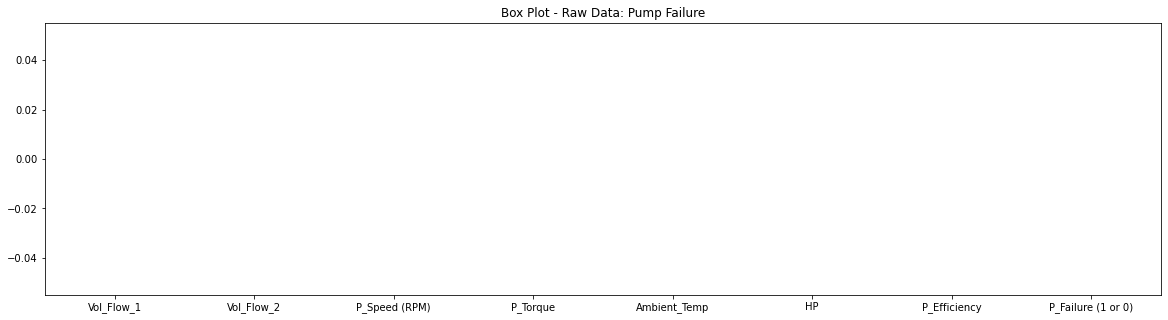

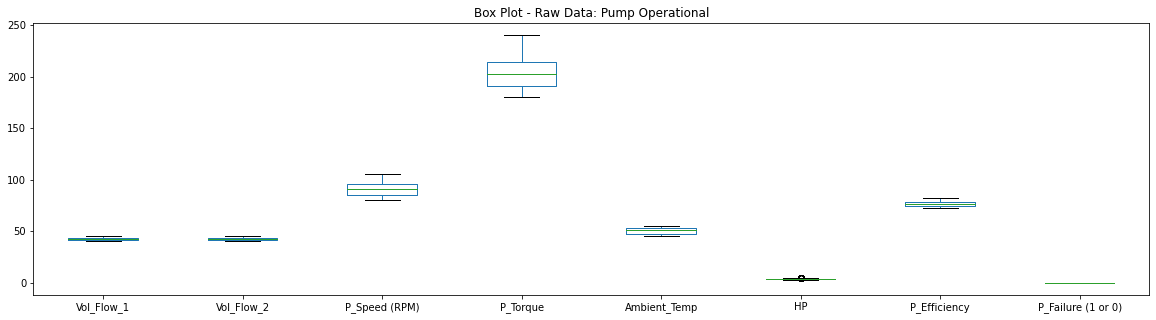

In [15]:
# Visualize the distribution of pump features during pump failure and print the shape of the data w/ no outliers
p_fail_no_outliers = dataframe_no_outliers[dataframe_no_outliers['P_Failure (1 or 0)']==1]
print(p_fail_no_outliers.shape)
p_fail_no_outliers.plot(kind='box', figsize=(20,5), title='Box Plot - Raw Data: Pump Failure')

# Visualize the distribution of pump features during normal operations and print the shape of data w/ no outliers
p_oper_no_outliers = dataframe_no_outliers[dataframe_no_outliers['P_Failure (1 or 0)']==0]
print(p_oper_no_outliers.shape)
p_oper_no_outliers.plot(kind='box', figsize=(20,5), title='Box Plot - Raw Data: Pump Operational');

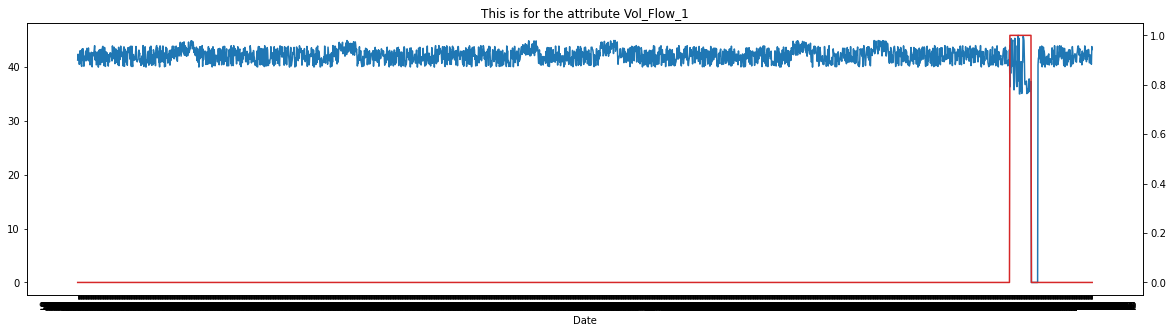

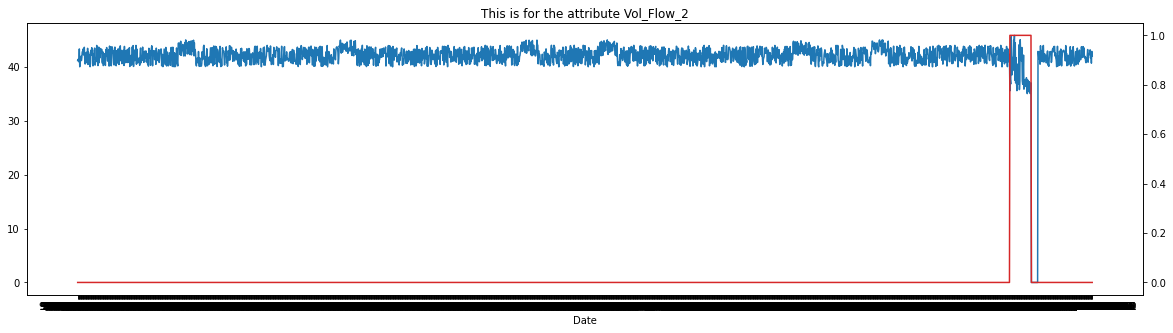

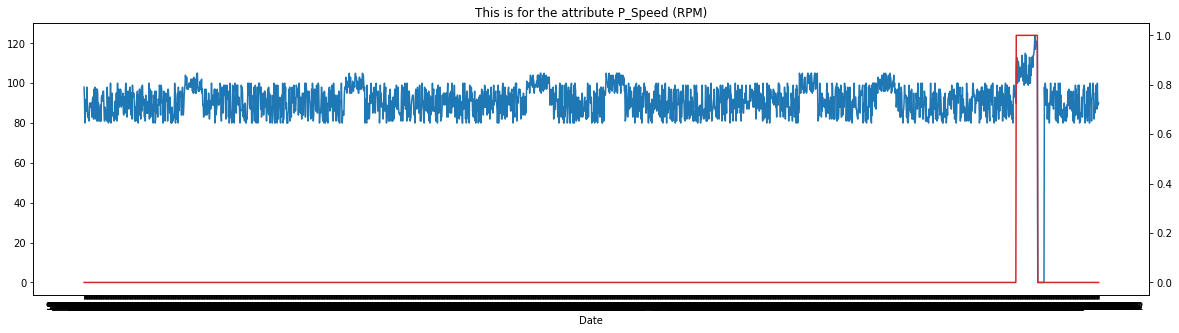

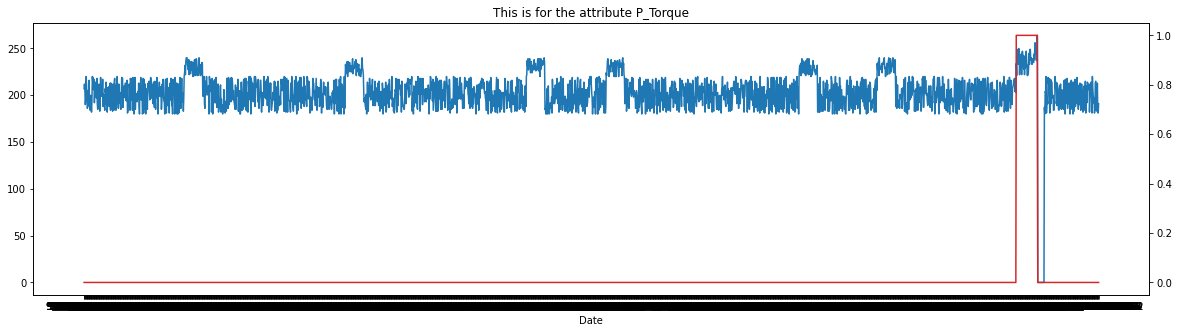

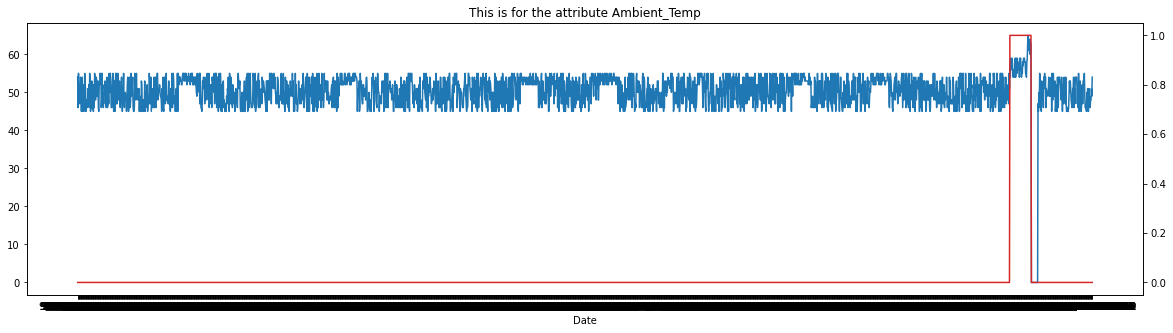

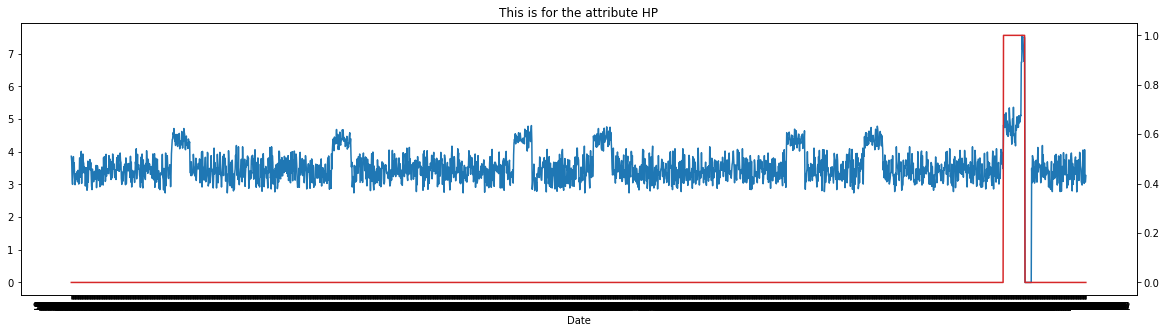

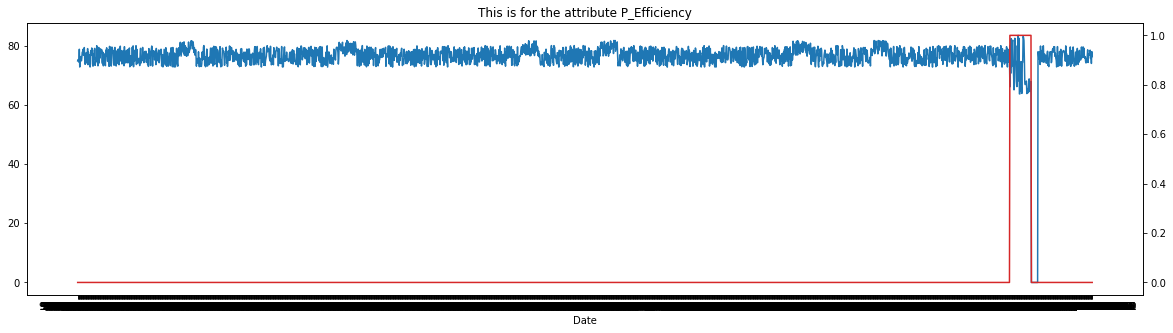

<Figure size 1440x360 with 0 Axes>

In [19]:
# create a for loop to pull data from each column
for col in dataframe_raw.columns[0:-1]:
    
    # pull the data from the columns and plot
    ax1 = dataframe_raw[col].plot()
    
    # create formatting for the table
    color = 'tab:blue'
    ax1.set_title('This is for the attribute' + " " + col)
    
    # create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()
    
    # format the second y-axis
    color = 'tab:red'
    ax2.plot(dataframe_raw['P_Failure (1 or 0)'], color=color)
    plt.show();

# otherwise the right y-label is slightly clipped    
plt.tight_layout();

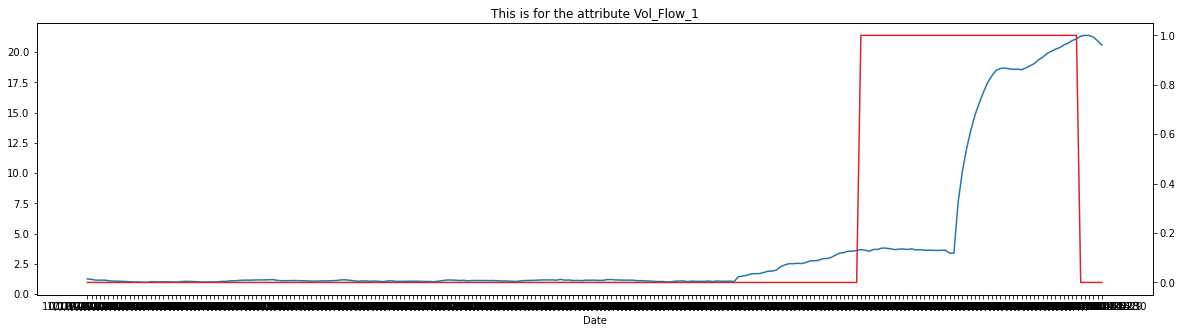

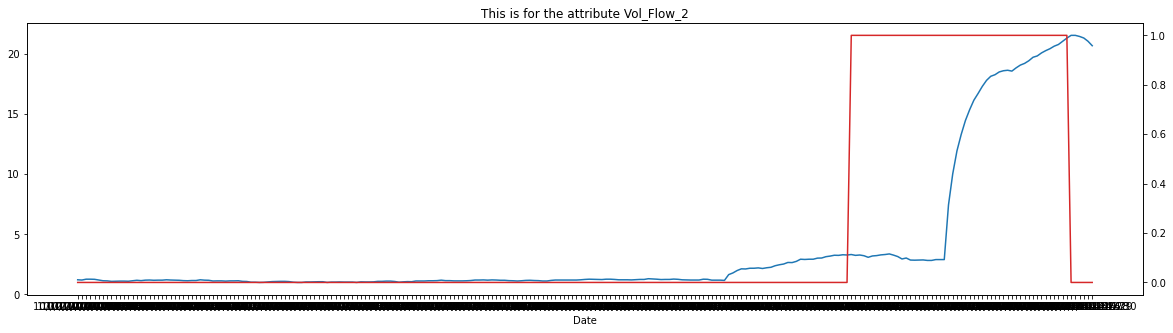

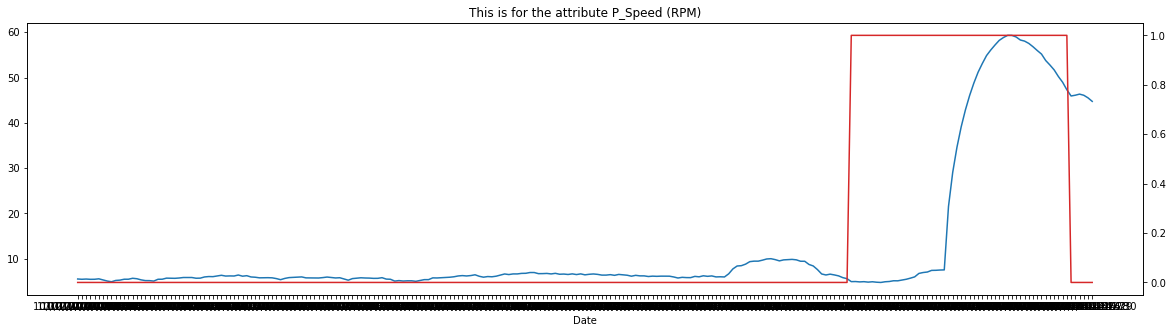

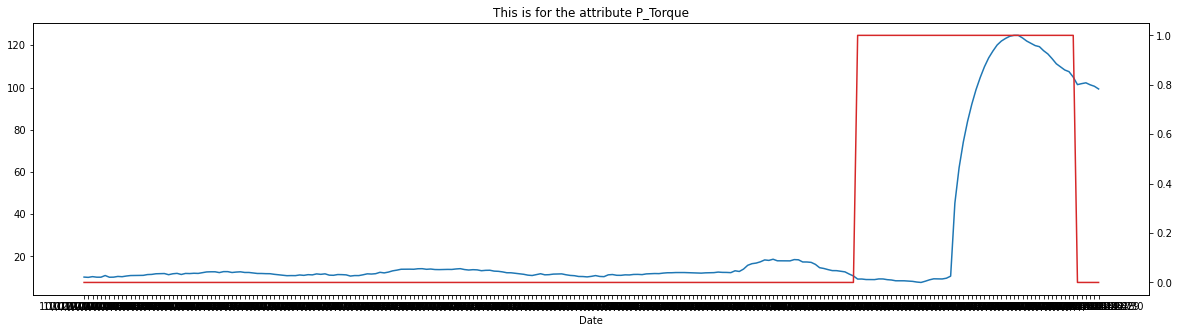

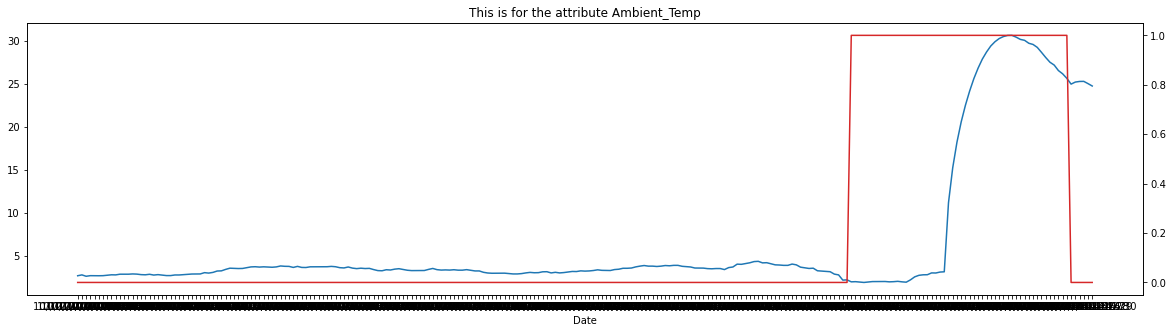

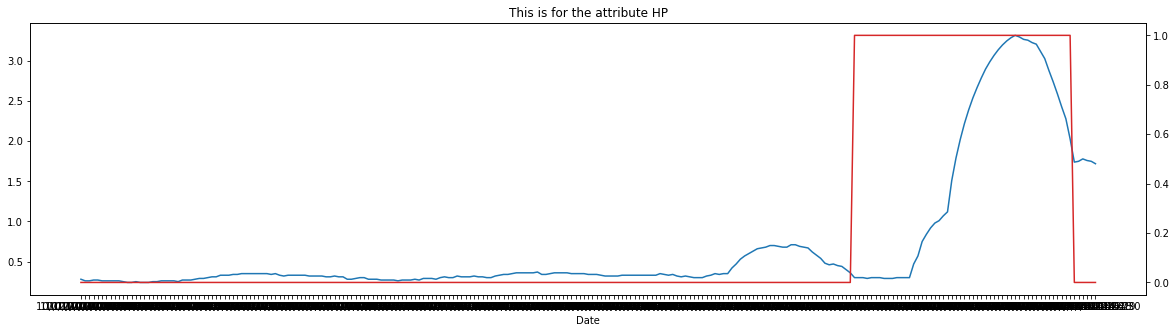

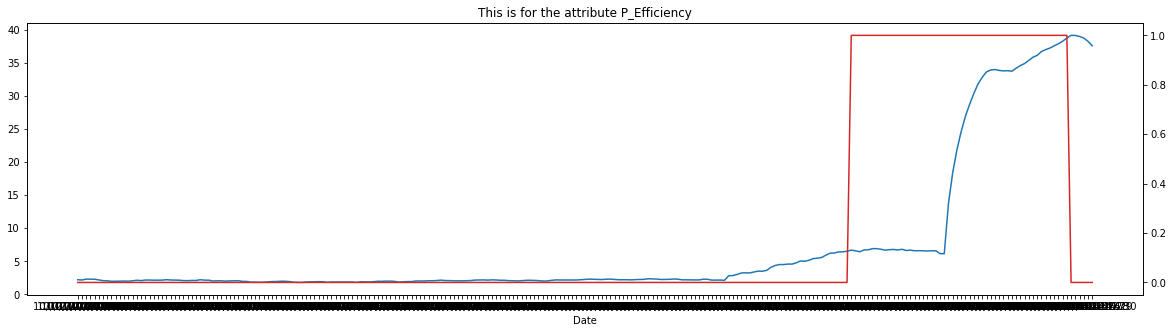

<Figure size 1440x360 with 0 Axes>

In [20]:
# Filter Standard Deviation data set to between 10/12/2014 10:30 to 10/12/2014 14:30 - to capture the pump failure
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 10:30") & (dataframe_stdev.index <= "10/12/2014 14:30")]

# create a for loop to pull data from each column
for col in dataframe_time_filtered.columns[0:-1]:
    
    # plot the data from the columns
    ax1 = dataframe_time_filtered[col].plot()
    
    # create formatting for the table
    color = 'tab:blue'
    ax1.set_title('This is for the attribute' + " " + col)
    
    # create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()
    
    # format the second y-axis
    color = 'tab:red'
    ax2.plot(dataframe_time_filtered['P_Failure (1 or 0)'], color=color)
    plt.show();

# otherwise the right y-label is slightly clipped    
plt.tight_layout();

# Inferential Statistics

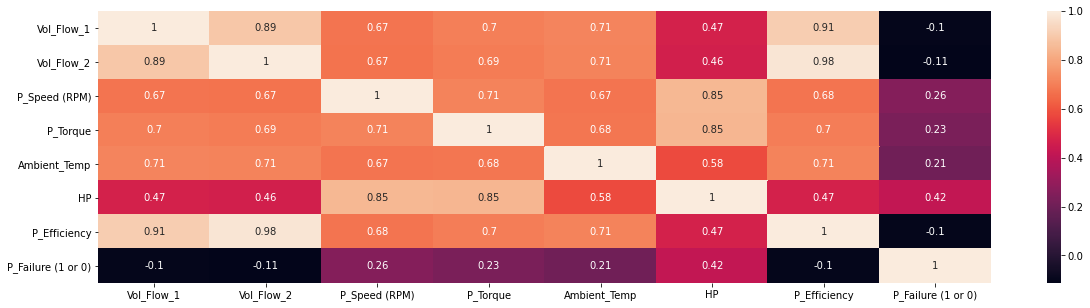

In [21]:
# Create a heatmap of the raw data to identify correlated pump features
sns.heatmap(dataframe_raw.corr(), annot=True, xticklabels=dataframe_raw.columns, yticklabels=dataframe_raw.columns);

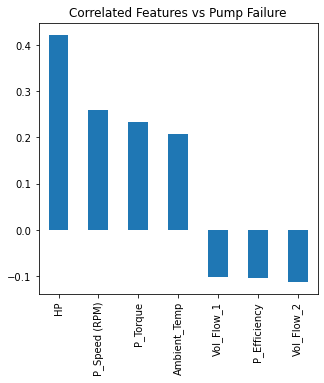

In [22]:
# filter df to get correlated values of all features against pump failure
df1 = dataframe_raw.corr().loc['P_Failure (1 or 0)'].drop(['P_Failure (1 or 0)'])

# change to descending order
df1 = df1.sort_values(ascending=False)

# plot with title
df1.plot(kind='bar', title='Correlated Features vs Pump Failure', figsize=(5,5));

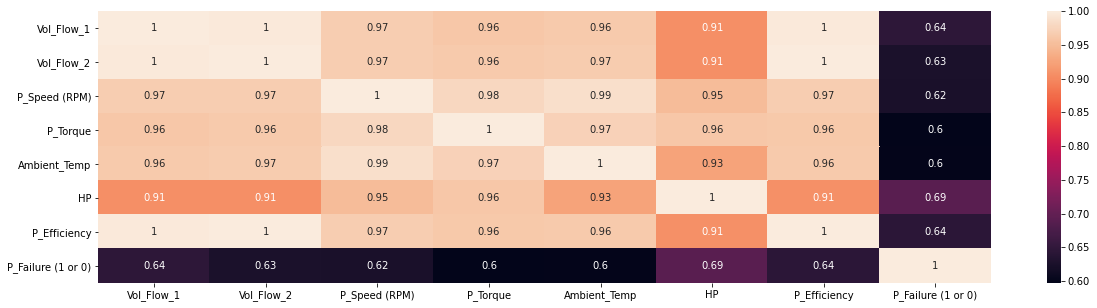

In [23]:
# Create a heatmap of the standard deviation data to compare correlated pump features with raw data
sns.heatmap(dataframe_stdev.corr(), annot=True, xticklabels=dataframe_raw.columns, yticklabels=dataframe_raw.columns);

In [24]:
# Develop an OLS Regression Model to simulate pump failure

# define the data for the loop to get the x values using raw data
df = dataframe_raw.drop(['P_Failure (1 or 0)'], axis=1)

# pull the data for x with each itteration, and compare to the constant, y, model and fit
for x in df[1:-1]:
    y = dataframe_raw['P_Failure (1 or 0)']
    x = df   
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    result = model.fit()

# print the summary
print('OLS Regression Model for Raw Data')
print(result.summary())
print('')
print('')

# define the data for the x value using stdev
dfstd = dataframe_stdev.drop(['P_Failure (1 or 0)'], axis=1)

# pull the data for the x value, compare to the constant, y, model and fit
for x in dfstd:
    y = dataframe_stdev['P_Failure (1 or 0)']
    x = dfstd  
    x = sm.add_constant(x)
    model_dfstd = sm.OLS(y, x)
    result_dfstd = model_dfstd.fit()

# print the results summary
print('OLS Regression Model for Standard Deviation Data')
print(result_dfstd.summary())

OLS Regression Model for Raw Data
                            OLS Regression Results                            
Dep. Variable:     P_Failure (1 or 0)   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     197.9
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          5.58e-233
Time:                        16:20:14   Log-Likelihood:                 1823.0
No. Observations:                2453   AIC:                            -3630.
Df Residuals:                    2445   BIC:                            -3583.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const       

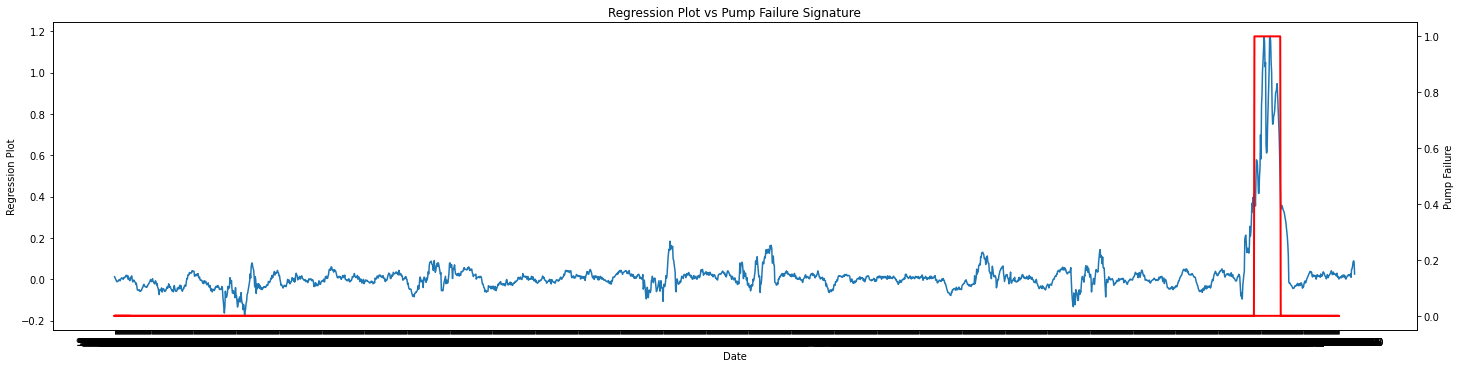

In [25]:
# Plot the rolling Standard Deviation data against Pump Failure

# Predict results model
result_dfstd.predict()

# Plot model results
ax = result_dfstd.predict(x).plot()

# Define a secondary axis and plot in a seperate color
ax2 = ax.twinx()
ax2.plot(dataframe_stdev['P_Failure (1 or 0)'], color='red', linewidth=2)
plt.tight_layout()

# Title and axes labels
plt.title('Regression Plot vs Pump Failure Signature')
ax.set_ylabel('Regression Plot')
ax2.set_ylabel('Pump Failure')
plt.show();